In [18]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib import pyplot

In [19]:
def load_dataset(filename):
    data = read_csv(filename, header=None)
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:, -1]
    return X, y

In [20]:
def select_feature(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [21]:
X, y = load_dataset('pima-indians-diabetes.csv')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [23]:
X_train_fs, X_test_fs, fs = select_feature(X_train, y_train, X_test)

In [24]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


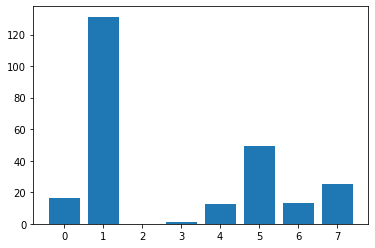

In [25]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()